In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756178 sha256=9fd71dd78528c5ebd35a6cec08a4875eb438ee81a9c08f75400ee1ae8e8b1780
  Stored in directory: /tmp/pip-ephem-wheel-cache-b9as8drl/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [ ]:
!pip install pyproj==1.9.6

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')#connecting the notebook to your drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb#scrollTo=j0DabqOUjjcG

### Cylindrical projections

The simplest of map projections are cylindrical projections, in which lines of constant latitude and longitude are mapped to horizontal and vertical lines, respectively.
This type of mapping represents equatorial regions quite well, but results in extreme distortions near the poles.
The spacing of latitude lines varies between different cylindrical projections, leading to different conservation properties, and different distortion near the poles.
In the following figure we show an example of the *equidistant cylindrical projection*, which chooses a latitude scaling that preserves distances along meridians.
Other cylindrical projections are the Mercator (``projection='merc'``) and the cylindrical equal area (``projection='cea'``) projections.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


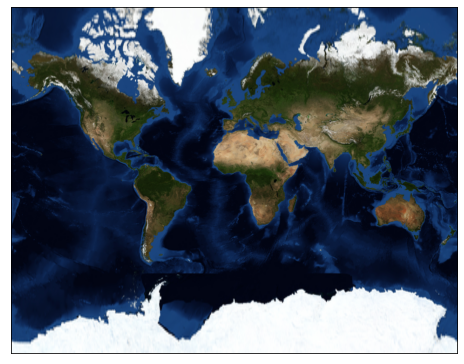

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='c')

m.bluemarble(scale=0.2)   # full scale will be overkill

plt.show()

### Pseudo-cylindrical projections

Pseudo-cylindrical projections relax the requirement that meridians (lines of constant longitude) remain vertical; this can give better properties near the poles of the projection.
The Mollweide projection (``projection='moll'``) is one common example of this, in which all meridians are elliptical arcs.
It is constructed so as to preserve area across the map: though there are distortions near the poles, the area of small patches reflects the true area.
Other pseudo-cylindrical projections are the sinusoidal (``projection='sinu'``) and Robinson (``projection='robin'``) projections.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


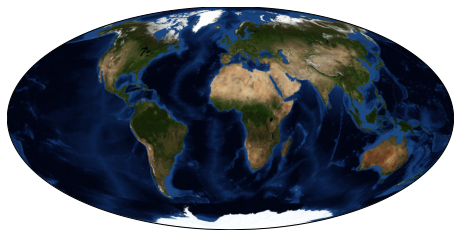

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)

m.bluemarble(scale=0.2)   # full scale will be overkill

plt.show()

### Perspective projections

Perspective projections are constructed using a particular choice of perspective point, similar to if you photographed the Earth from a particular point in space (a point which, for some projections, technically lies within the Earth!).
One common example is the orthographic projection (``projection='ortho'``), which shows one side of the globe as seen from a viewer at a very long distance. As such, it can show only half the globe at a time.
Other perspective-based projections include the gnomonic projection (``projection='gnom'``) and stereographic projection (``projection='stere'``).
These are often the most useful for showing small portions of the map.

Here is an example of the orthographic projection:

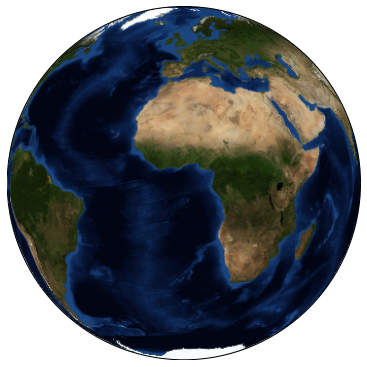

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='ortho', resolution=None,
            lat_0=0, lon_0=0)

m.bluemarble(scale=0.2)   # full scale will be overkill

plt.show()

In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/tweets.csv')

In [ ]:
df.head(1)

,tweet_id,tweet_created_at,source,original_text,tweet_favorite_count,retweet_count,hashtags,user_mentions,user_mentions_id,topic,keyword,emojis,possibly_sensitive,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,user_id,user_followers_count,user_listed_count,user_favourites_count,user_statuses_count,user_created_at,user_screen_name,place,latitude_corr,longitude_corr,place_coord_boundaries
0,1290559659141734401,Tue Aug 04 08:06:14 +0000 2020,"<a href=""http://twitter.com/#!/download/ipad"" ...",@RedRosa91940184 @JamesEFoster @pguk10 Ask him...,0,2,NaN,"HughRJWilliams, RedRosa91940184, JamesEFoster,...","[437597325, 890492598443540480, 29422823, 2844...",Technology,wikipedia,{},NaN,NaN,NaN,NaN,1026018721561751552,3867,4,45239,76278,Sun Aug 05 08:15:00 +0000 2018,Stephen888WTF,"London, England",51.507322,-0.127647,NaN


In [ ]:
coordinates=df.groupby(['latitude_corr','longitude_corr'])['tweet_id'].count().reset_index(name="count")

In [ ]:
locations = coordinates[['latitude_corr','longitude_corr']]

In [ ]:
weights= coordinates['count']

In [ ]:
# Extract the data we're interested in
latitude = coordinates['latitude_corr'].values
longitude = coordinates['longitude_corr'].values
weight = coordinates['count'].values


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


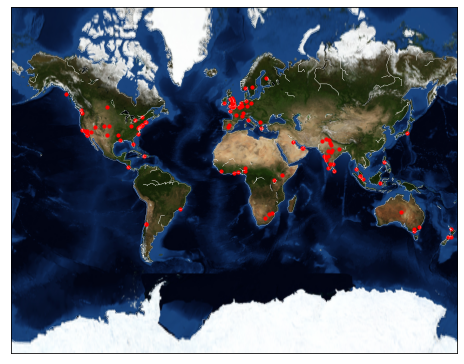

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='c')

m.bluemarble(scale=0.2)   # full scale will be overkill
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines

x, y = m(longitude, latitude)  # transform coordinates
plt.scatter(x, y, 10, marker='o', color='Red') 

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


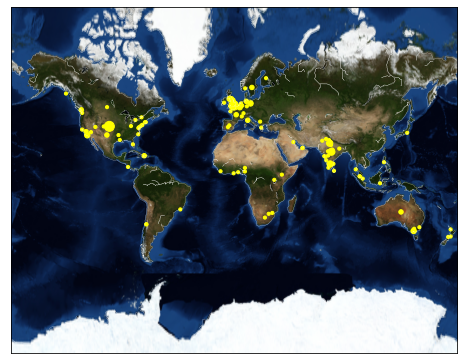

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='c')

m.bluemarble(scale=0.2)   # full scale will be overkill
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines

x, y = m(longitude, latitude)  # transform coordinates
plt.scatter(x, y, 10*weight, marker='o', color='yellow') 

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


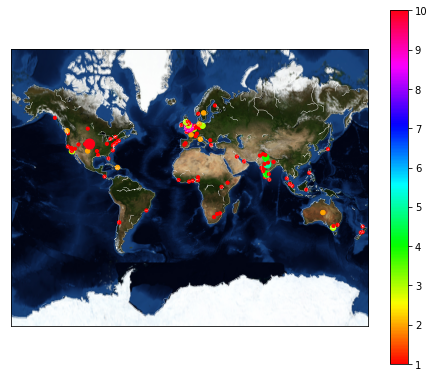

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='c')

m.bluemarble(scale=0.2)   # full scale will be overkill
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines

x, y = m(lon, latitude)  # transform coordinates
plt.scatter(x, y, 10*weight, marker='o',c=weight, cmap='hsv')
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


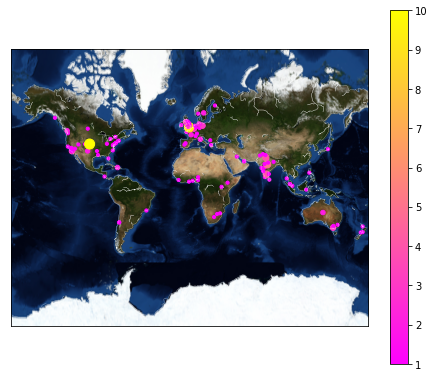

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='c')

m.bluemarble(scale=0.2)   # full scale will be overkill
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines

x, y = m(lon, latitude)  # transform coordinates
plt.scatter(x, y, 10*weight, marker='o',c=weight, cmap='spring')
plt.colorbar()
plt.show()

https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
